In [2]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
import seaborn as sns

crime=pd.read_csv(r"F:/Sampada/Sampada/Assignments/Clustering/crime_data.csv")
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [3]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [4]:
crime[crime.duplicated()].shape

(0, 5)

In [6]:
crime_colrename=crime.rename({'Unnamed: 0': 'Place_Name'}, axis=1)
crime_colrename

,Place_Name,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [7]:
#Hierarchical Clustering
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return (x)

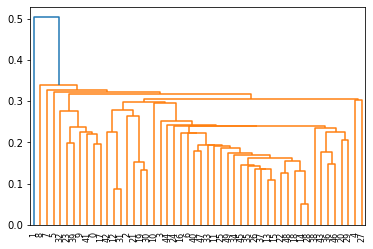

In [8]:
crime_norm=norm_func(crime_colrename.iloc[:,1:])
dendrogram=sch.dendrogram(sch.linkage(crime_norm,method='single'))

In [9]:
crime_hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='single')
y_hc=crime_hc.fit_predict(crime_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
Clusters

,Clusters
0,0
1,3
2,0
3,0
4,0
5,4
6,0
7,1
8,2
9,0


In [10]:
model1=Clusters.Clusters.value_counts()
model1

0    46
3     1
4     1
1     1
2     1
Name: Clusters, dtype: int64

Using Single Linkage clustering most of the observations are belonging to 0th cluster

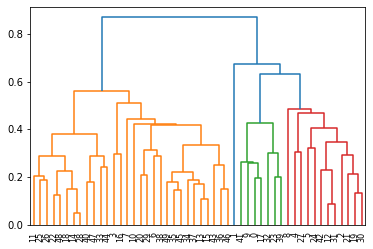

In [12]:
dendrogram=sch.dendrogram(sch.linkage(crime_norm,method='average'))

In [13]:
crime_hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='average')
y_hc=crime_hc.fit_predict(crime_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
model2=Clusters.Clusters.value_counts()
model2

0    18
1    12
4    12
3     7
2     1
Name: Clusters, dtype: int64

Using Average Linkage clustering most of the observations are belonging to 0th,1st and 4th cluster

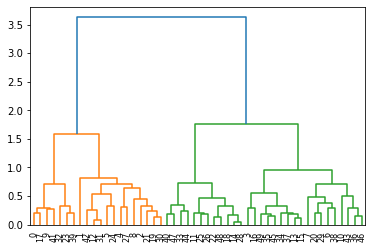

In [14]:
dendrogram=sch.dendrogram(sch.linkage(crime_norm,method='ward'))

In [16]:
air_hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
y_hc=crime_hc.fit_predict(crime_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
model3=Clusters.Clusters.value_counts()
model3

0    18
1    12
4    12
3     7
2     1
Name: Clusters, dtype: int64

Using Ward Linkage clustering most of the observations are belonging to 0th,1st and 4th cluster

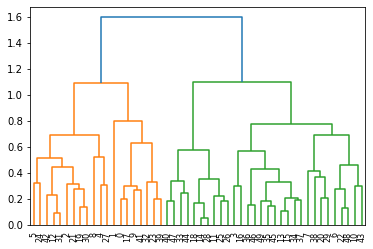

In [18]:
dendrogram=sch.dendrogram(sch.linkage(crime_norm,method='complete'))

In [19]:
air_hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='complete')
y_hc=crime_hc.fit_predict(crime_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
model4=Clusters.Clusters.value_counts()
model4

0    18
1    12
4    12
3     7
2     1
Name: Clusters, dtype: int64

Using Complete Linkage clustering most of the observations are belonging to 0th,1st and 4th cluster

In [22]:
from sklearn.cluster import KMeans

model=KMeans(n_clusters=5)
model.fit(crime_norm)
model.labels_

C:\Users\sonali jante\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 0, 0, 4, 0, 0, 3, 4, 0, 2, 3, 1, 0, 4, 1, 4, 4, 2, 1, 0, 3, 0,
       1, 2, 4, 1, 1, 0, 1, 3, 0, 0, 2, 1, 4, 4, 4, 3, 3, 2, 1, 2, 0, 3,
       1, 4, 4, 1, 1, 4])

In [23]:
md=pd.Series(model.labels_)
crime_colrename['clust']=md
crime_colrename

,Place_Name,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,2
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,4
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,3
7,Delaware,5.9,238,72,15.8,4
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,2


In [24]:
model5=crime_colrename.clust.value_counts()
model5

0    12
4    12
1    12
2     7
3     7
Name: clust, dtype: int64

Using KMeans Clustering most of the observations are belonging to 0th,1st and 4th cluster

In [33]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

#crime_colrename.drop(['Place_Name'],axis=1,inplace=True)
array=crime_colrename.values
stscaler=StandardScaler().fit(array)
X=stscaler.transform(array)
#min_samples is number of columns
dbscan=DBSCAN(eps=0.5,min_samples=5)
dbscan.fit(X)

DBSCAN()

In [34]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)

Using DBSCAN all observations belongs to single cluster